In [12]:
import os
import glob
from pathlib import Path
import numpy as np

import wispy.model_utils
import wispy.utils

import wispy.logger
import argparse

import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.use("agg")

from cycler import cycler
from itertools import cycle

# mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

In [13]:
from collections import OrderedDict

In [14]:
hfiles = sorted(glob.glob("00*/history*"))
print(hfiles)

histories = OrderedDict()
for hfile in hfiles:
    key = hfile.split('/')[0]
    histories[key] = wispy.model_utils.load_history(hfile)

['001/history.pickle', '002/history.pickle', '003/history.pickle']


In [15]:
tfiles = sorted(glob.glob("00*/duration*"))
print(tfiles)

durations = OrderedDict()
for tfile in tfiles:
    key = tfile.split('/')[0]
    durations[key] = wispy.model_utils.load_datetime(tfile)

['001/duration.pickle', '002/duration.pickle', '003/duration.pickle']


In [16]:
for k,v in durations.items():
    print(k, v)

001 8:52:19.509587
002 18:48:52.154729
003 9:48:28.200063


In [17]:
histories.keys()

odict_keys(['001', '002', '003'])

In [18]:
# histories['001'].keys()

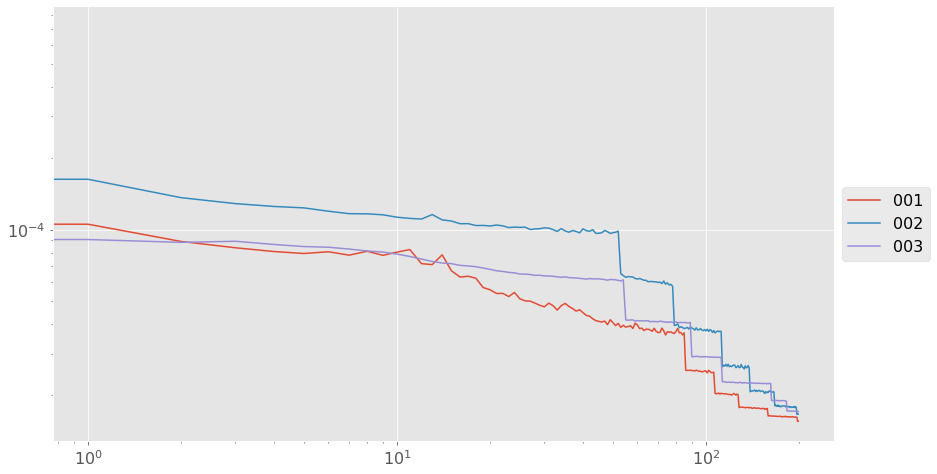

In [19]:
plt.figure(figsize=(14, 8))
for k,v in histories.items():
    plt.plot(v['mse'], label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
plt.xscale('log')
# plt.ylim(1e-4, 1e-3)

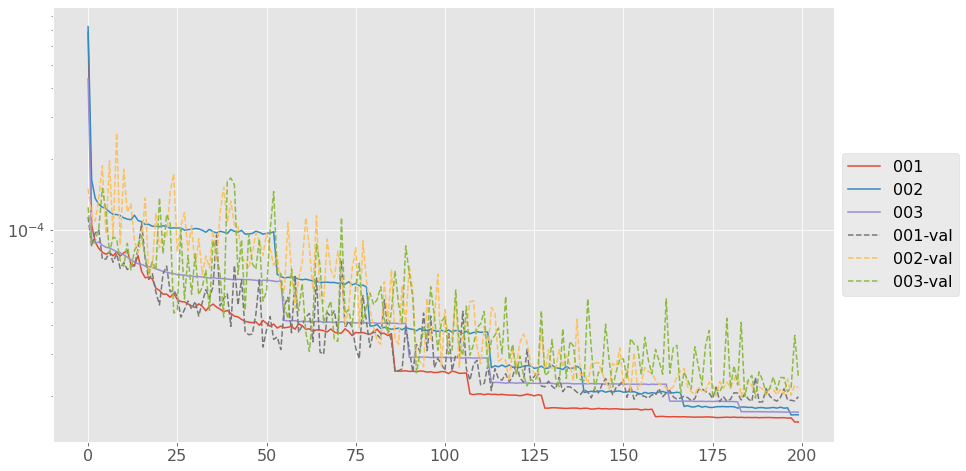

In [21]:
plt.figure(figsize=(14, 8))

for k,v in histories.items():
    plt.plot(v['mse'], '-', label=k)
for k,v in histories.items():
    plt.plot(v['val_mse'], '--', label=k+'-val')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
# plt.xscale('log')

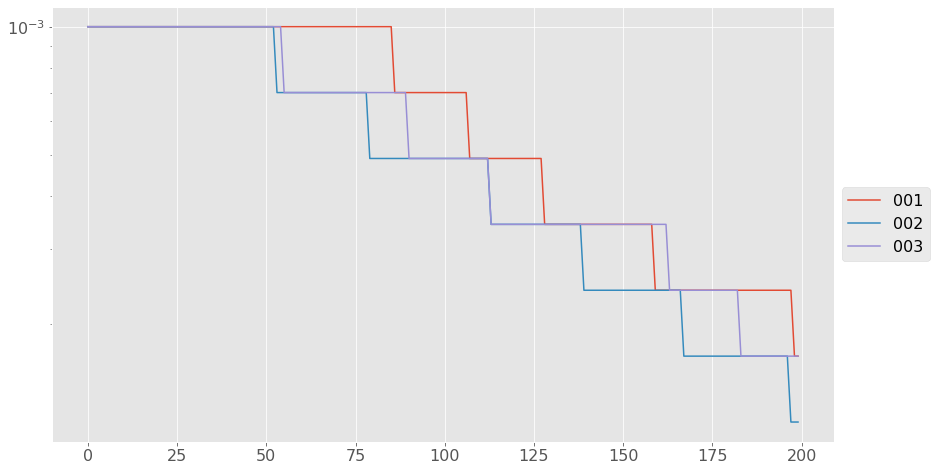

In [22]:
plt.figure(figsize=(14, 8))

for k,v in histories.items():
    if 'lr' in v.keys():
        plt.plot(v['lr'], '-', label=k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')
# plt.xscale('log')